<a href="https://colab.research.google.com/github/FerCuevas27/github-pages-with-jekyll/blob/main/IA_Practica4_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 4: Clustering**

**Nombre:** Luis Fernando Cuevas Cuauhtle

**No.** Cuenta: 416071665

**Email:** fernando.unam.fi@gmail.com 



**Objetivo**

Obtener grupos de paccientes con caracteriósticas similares, diagnosticadas con un tumor de mama, a través de clustering jerárquico y particional.

Datos clínicos a partir de imagenes digitalizados de pacientes con cancer de mama en un hospital de Wisconsin. 




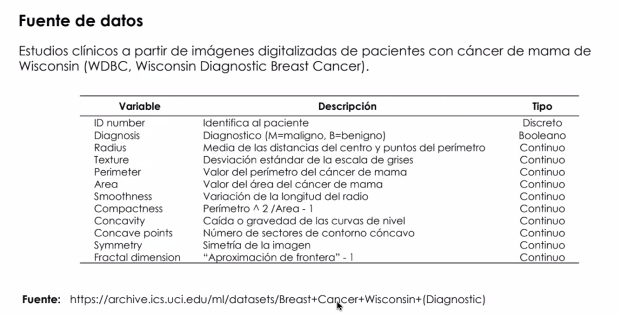

**Importación de Librerías**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns            #Los gráficos se generen dentro del cuaderno
%matplotlib inline             

# **Acceso a los datos**



In [3]:
from google.colab import files
files.upload()

Saving WDBCOriginal.xls to WDBCOriginal.xls


{'WDBCOriginal.xls': b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00>\x00\x03\x00\xfe\xff\t\x00\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x19\x01\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\xfe\xff\xff\xff\x00\x00\x00\x00\xfe\xff\xff\xff\x00\x00\x00\x00\x16\x01\x00\x00\x17\x01\x00\x00\x18\x01\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x

# **Importación de Datos**

In [5]:
BCancer = pd.read_excel('WDBCOriginal.xls')
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


En el ID existe un tipo de dato nominal, que es el diagnostico que le dió el doctor. Nos permite conocer la cantidad de casos que fueron diagnosticados con o sin cancer.

Se eliminará esta columna, debido a que ya lleva inherentemente la agrupación de datos.

In [6]:
print(BCancer.groupby('Diagnosis').size())

Diagnosis
B    357
M    212
dtype: int64


# **Paso 1: Selección de Características**

Se utiliza una metriz de correlaciones con el proposito de definir un grupo d ecaracterísticas significativas.

Examen visual si existe una relación entre los datos.

Está pintando con diferentes colores los diagnosticos. Los amarillos son los casos de los tumores beningnos, al ser de un área mayor. Los malignos son los azules.

Se puede ver que la mayoria están dispersos, pero en otros hay una alta xorrelación, una linealidad o redundancia de información.

Por ejemplo: El perímetro y el radio, al igual que el area, son 3 mediciones que comparten la misma información y por lo cual existe una cierta redundancia. Y por lo cual 1 sola variable de estas 3 nos puede dar información suficiente

NameError: ignored

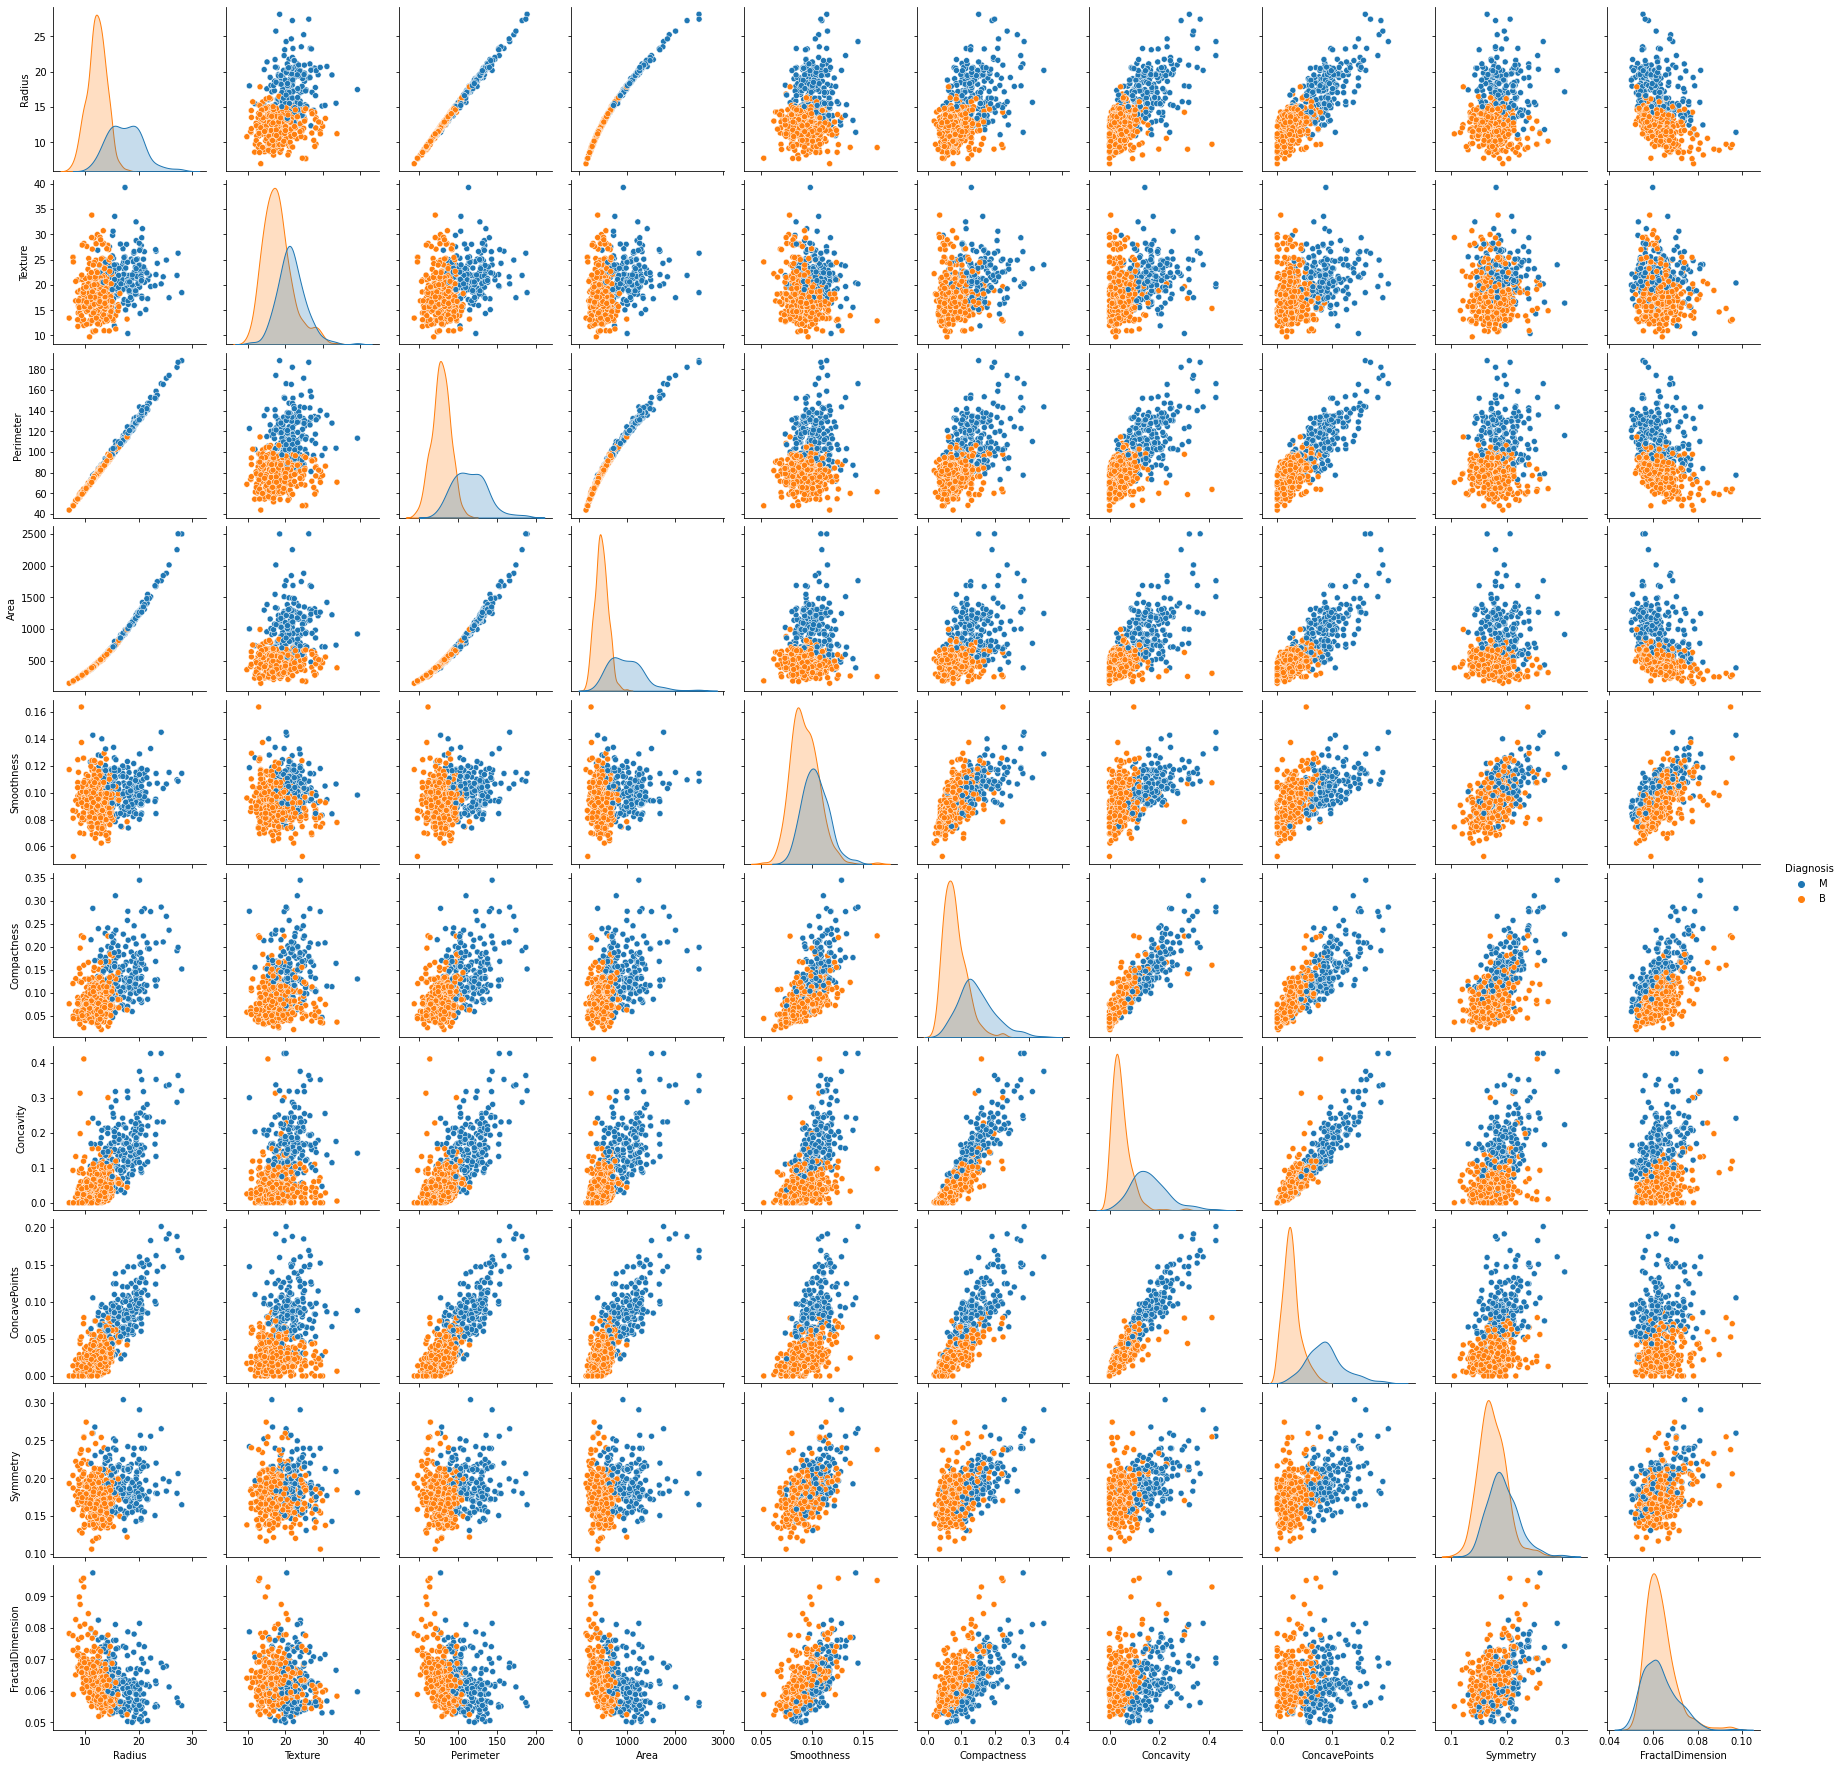

In [7]:
sns.pairplot(BCancer, hue='Diagnosis')
plt.show

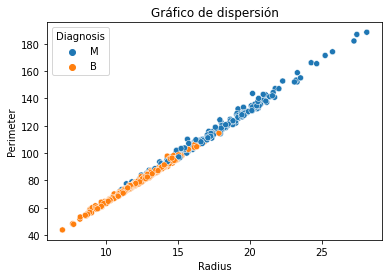

In [12]:
#plt.plot(BCancer['radius'], BCancer['Perimeter'], 'b+')
sns.scatterplot(x='Radius', y='Perimeter', data = BCancer, hue='Diagnosis')
plt.title('Gráfico de dispersión')
plt.xlabel('Radius')
plt.ylabel('Perimeter')
plt.show()

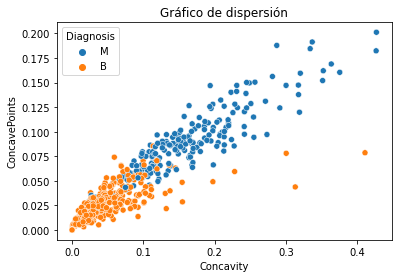

In [15]:
#plt.plot(BCancer['radius'], BCancer['Perimeter'], 'b+')
sns.scatterplot(x='Concavity', y='ConcavePoints', data = BCancer, hue='Diagnosis')
plt.title('Gráfico de dispersión')
plt.xlabel('Concavity')
plt.ylabel('ConcavePoints')
plt.show()

In [13]:
CorrBCancer = BCancer.corr(method='pearson')
CorrBCancer

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
Radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
Texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
Perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
Area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
Smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
Compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
Concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
ConcavePoints,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
Symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
FractalDimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


Entre más cercano a 1, existe una mayor correlación entre variables. Y más cercano a 0, los datos se interpretarán como dispersos

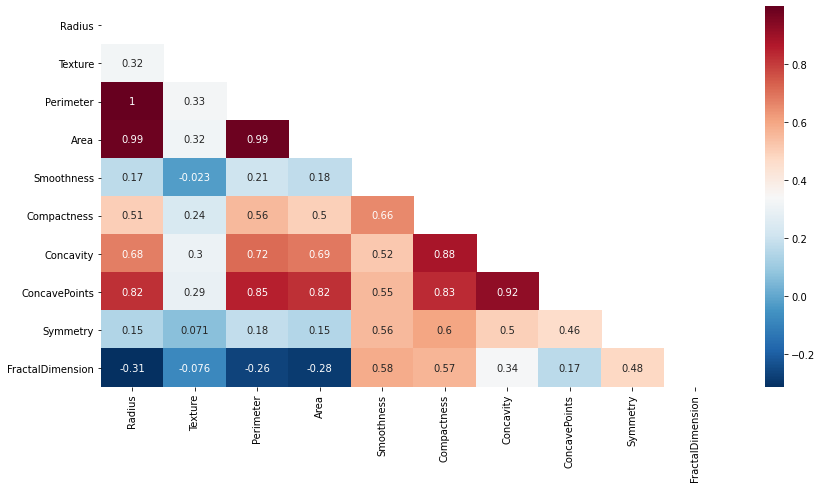

In [16]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrBCancer)
sns.heatmap(CorrBCancer, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

Con base a esta matriz ir por los que no tienen altas correlaciones. 

Por ejemplo: 

**Textura**, no tiene tanta relación con las demás variables, por lo que será muy significativa

**Simetría**; también no tiene alta correlación con ninguna otra variable

**Suavidad**: También se considera de muy baja correlación y por lo tanto se quedaría.

**Compactness**: También no tiene tanta relación con otras variables, relaciones bajas o medias 


En total existen 12 correlaciones altas; de las que tenemos dudas.

Una de las que se iría sería:

Radius por tener una alta dependencia con otras variables, debido a que se puede obtener esta información con area o perímetro

**El área** nos podría decir que tan grande es el tumor, por lo que puede ser de mayor utilidad que el perímetro

**El perímetro**, tiene mayor cantidad de correlaciones comparado con área, y como no da tanta información, de la ya obtenida por el área, tambíen la podemos quitar


**Concavidad y Puntos concavos** tienen una gran correlación con **Compactness**, por los que podemos quitarlas.

Al quitar variables, se reduce la dimensionalidad, de 10 originalmente, nos quedaremos con 6. Y estas nos dan una representación suficientemente completa del modelo.

# **Selección de Variables**

In [17]:
print(CorrBCancer['Radius'].sort_values(ascending=False)[:10], '\n')

Radius              1.000000
Perimeter           0.997855
Area                0.987357
ConcavePoints       0.822529
Concavity           0.676764
Compactness         0.506124
Texture             0.323782
Smoothness          0.170581
Symmetry            0.147741
FractalDimension   -0.311631
Name: Radius, dtype: float64 



Variables Seleccionadas



1.   Textura 
2.   Elemento de lista



In [21]:
MatrizVariables = np.array(BCancer[['Texture','Area','Smoothness','Compactness','Symmetry','FractalDimension']])
#MatrizVariables = BCancer
pd.DataFrame(MatrizVariables)

,0,1,2,3,4,5
0,10.38,1001.0,0.11840,0.27760,0.2419,0.07871
1,17.77,1326.0,0.08474,0.07864,0.1812,0.05667
2,21.25,1203.0,0.10960,0.15990,0.2069,0.05999
3,20.38,386.1,0.14250,0.28390,0.2597,0.09744
4,14.34,1297.0,0.10030,0.13280,0.1809,0.05883
...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.11590,0.1726,0.05623
565,28.25,1261.0,0.09780,0.10340,0.1752,0.05533
566,28.08,858.1,0.08455,0.10230,0.1590,0.05648
567,29.33,1265.0,0.11780,0.27700,0.2397,0.07016


# **Clustering**


**Algorítmo Ascendente Jerárquico**

In [23]:
#Se importan las bibliotecas de clustering jerárquico
import scipy.cluster.hierarchy as shc                   #Biblioteca que nos ayuda a hacer el clustere jerárquico
from sklearn.cluster import AgglomerativeClustering     #Se importa el algorítmo

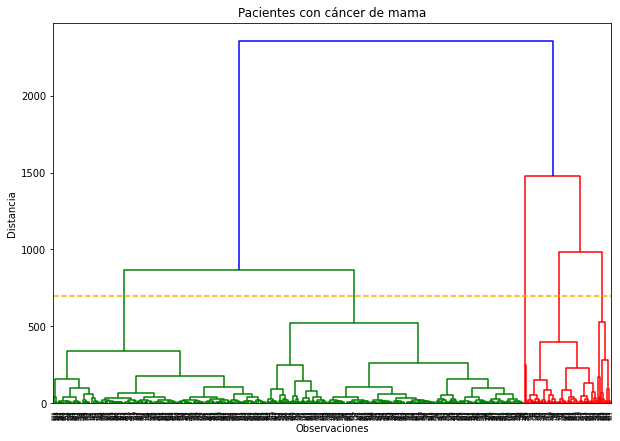

In [26]:
#Se crea el arbol
plt.figure(figsize=(10,7))
plt.title("Pacientes con cáncer de mama")
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
Arbol = shc.dendrogram(shc.linkage(MatrizVariables, method='complete', metric='euclidean'))
plt.axhline(y=700, color='orange',linestyle='--') #Cuando ya se tenga definido con cuantos grupos se va a trabajar, se dice donde va a cortar

Podríamos bajar el nivel de profundidad, con 5 clusters

In [27]:
#Se crean las etiquetas de los elementos en los clusters
MJerarquico = AgglomerativeClustering(n_clusters=5, linkage='complete', affinity='euclidean') #Se crea objeto 
MJerarquico.fit_predict(MatrizVariables)    #Pinta los numeros dentro de la matriz, de esta matriz, se le dice a que registro a que grupo va a asignarse
MJerarquico.labels_

array([1, 3, 3, 4, 3, 4, 3, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 4,
       1, 3, 1, 1, 1, 3, 1, 1, 3, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1,
       1, 3, 4, 1, 4, 1, 4, 1, 4, 3, 1, 4, 3, 1, 1, 4, 4, 4, 1, 4, 1, 1,
       4, 4, 4, 1, 3, 4, 1, 1, 4, 1, 1, 1, 3, 1, 4, 1, 0, 3, 4, 3, 1, 3,
       4, 1, 1, 1, 1, 1, 1, 3, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 4, 4, 0, 4,
       4, 4, 1, 4, 4, 4, 4, 1, 1, 1, 4, 3, 0, 1, 1, 1, 1, 3, 1, 3, 4, 1,
       1, 1, 3, 1, 4, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4,
       1, 4, 1, 1, 4, 4, 4, 3, 3, 4, 0, 1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4,
       4, 1, 1, 1, 2, 3, 1, 4, 1, 4, 3, 4, 4, 4, 1, 1, 4, 4, 1, 1, 1, 3,
       3, 1, 4, 1, 0, 1, 4, 1, 4, 1, 1, 1, 3, 4, 2, 1, 1, 1, 4, 4, 3, 3,
       1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 3, 4, 1, 0, 3, 1, 1, 1, 4,
       4, 1, 3, 4, 1, 1, 4, 4, 3, 4, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1,
       1, 3, 4, 1, 1, 4, 1, 4, 0, 4, 1, 4, 4, 3, 1, 1, 3, 4, 3, 1, 1, 1,
       4, 1, 4, 4, 1, 1, 1, 4, 1, 1, 4, 4, 1, 4, 3,

In [28]:
BCancer['clusterH'] = MJerarquico.labels_   #Crea la columna con las asignaciones de cada elemento a su respectivo cluster o grupo
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,clusterH
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,3
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,3
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,4
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,0
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,3
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,3


**Segmentación**

In [29]:
#Calcularemos la cantidad de elementos en los clusters
BCancer.groupby(['clusterH'])['clusterH'].count()

clusterH
0     14
1    263
2      3
3     72
4    217
Name: clusterH, dtype: int64

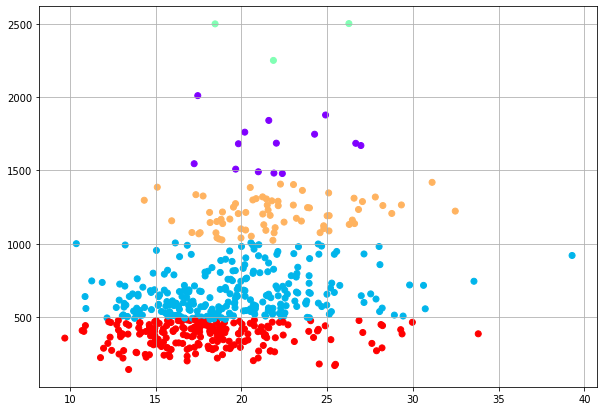

In [30]:
plt.figure(figsize=(10,7))
plt.scatter(MatrizVariables[:,0], MatrizVariables[:,1], c=MJerarquico.labels_, cmap='rainbow')
plt.grid()
plt.show()

Nos dice que hay un grupo de pacientes etiquetados como 0, que tienen un gran tamaño de tumor.

Los rojos, con menor tamaño de tumor.

In [31]:
CentroidesH = BCancer.groupby(['clusterH'])['Texture','Area','Smoothness','Compactness','Symmetry','FractalDimension'].mean() #Se trabaja desde pivotes, promedio de los elementos que conforman un cierto grupo
CentroidesH

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Texture,Area,Smoothness,Compactness,Symmetry,FractalDimension
clusterH,,,,,,
0,21.867857,1676.214286,0.107182,0.186916,0.194193,0.061179
1,19.406274,661.572624,0.095455,0.106559,0.178629,0.061496
2,22.203333,2416.666667,0.110667,0.180600,0.183633,0.056393
3,22.009028,1202.805556,0.099597,0.143579,0.191032,0.059826
4,18.039401,374.743318,0.095488,0.082252,0.180082,0.065554


Aquí podemos describir

Cluster 0: 14 pacientes con indicios de cancer maligno por el tamaño del tumor, con un área promedio de tumor de 1676 pixeles y una desviación estándar de textura de 21 pixeles. Aparentemente es un tumar compacto (0.18 pixeles), cura suavidad alcanza 0.10 pixeles, una simetría de 0.19 y una aproximación de frontera, dimensión fractal, promedio de 0.06 pixeles.

Cluster 1: Pacientes con tumores con uno de los menores tamaños de tumor, 

Cluster 2: Son aquellos pacientes con el mayor tamaño de tumor

cluster 3: Tie

Cluster 4: Pacientes con el menor tamaño del área, probablemente con tumores benignos

Se suele revisar con un especialista, y revisar de entre las características cuales permiten diagnosticar malignos o benignos.

# **Algorítmo K Means**



De apriori se proporciona una K de entrada, y se obtiene una aproximación de los clusters más cercanos.

**Importación de Bibliotecas**

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min #Por default trabaja con distancias euclidianas

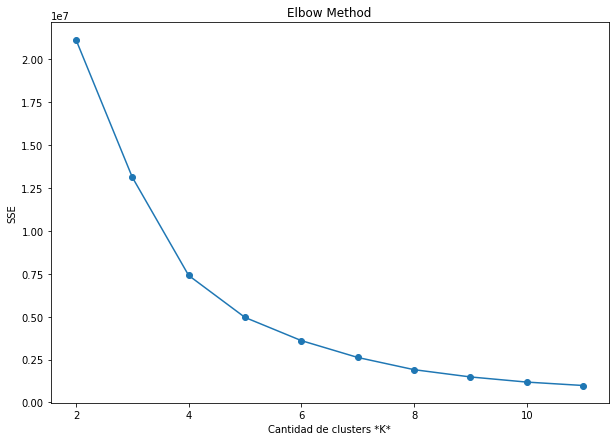

In [34]:
#Definición de k clusters para K-means 
#Se utiliza random_state para inicializar el generador interno  de números aleatorios
SSE= []                                           #Distancia de cada elemento, ya formada en un grupo, con respecto a su centro, la sumatoria de esaas distancias con respecto su centro
for i in range(2,12):                             #Se saca para varias configuraciones, de 2 a 12 configuraciones de k
  km = KMeans(n_clusters = i, random_state=0)     #Se mete el algoritmo, que tome el numero de k, y con random estado, genera internamente, si no si pusiera nada
  km.fit(MatrizVariables)                         #Se utilizan las 6 variables de la matriz
  SSE.append(km.inertia_)                         #Función interna de la caida (la  inercia), distancia al cuadrado, el valor que se obtenga lo pinta y luego lo graficamos

#Se grafica SSE en función de k
plt.figure(figsize=(10,7))                        #El cálculo que se está obteniendo se va a pintar para cada una de las configuraciones leidas en SSE
plt.plot(range(2,12),SSE, marker='o')             
plt.xlabel('Cantidad de clusters *K*')            
plt.ylabel('SSE')                                 
plt.title('Elbow Method')                         
plt.show()                                          

Sobre estas gráficas de distancias con respecto a su centro, se debe identificar ese punto de quiebre, cambio de sentido/dirección.

Está entre 4 y 5. Muchas veces las interpretaciones pueden ser diferentes. por lo que utilizaremos una funcion de k means, que localiza ese punto.

Aumentar la cantidad de cluster mejorará naturalmente el ajuste (se hará una mejor explicación de la variación). Sin embargo, se puede caer en un sobre ajuste.

Para evitar esas ambiguedad 

In [35]:
!pip install kneed

In [36]:
from kneed import KneeLocator
k1 = KneeLocator(range(2,12),SSE, curve="convex", direction="decreasing")
k1.elbow

5

Algoritmo K-means

In [37]:
#Se crean las etiquetas de los elementos en los clusters
MParticional = KMeans(n_clusters=5, random_state=0).fit(MatrizVariables)
MParticional.predict(MatrizVariables)
MParticional.labels_

array([4, 2, 2, 1, 2, 3, 4, 3, 3, 3, 4, 4, 2, 4, 3, 3, 3, 4, 2, 3, 3, 1,
       3, 2, 4, 4, 3, 2, 4, 4, 2, 1, 4, 2, 4, 4, 3, 3, 3, 3, 3, 1, 2, 3,
       3, 2, 1, 3, 1, 3, 1, 3, 1, 4, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 3,
       1, 1, 1, 3, 2, 1, 4, 3, 1, 4, 3, 4, 2, 3, 1, 3, 0, 2, 1, 2, 3, 2,
       1, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 2, 1,
       1, 3, 3, 1, 1, 1, 1, 3, 4, 4, 1, 2, 0, 3, 3, 3, 3, 2, 3, 2, 1, 4,
       4, 4, 2, 3, 1, 1, 3, 1, 1, 4, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1,
       3, 1, 4, 4, 1, 1, 1, 2, 2, 1, 0, 3, 1, 4, 4, 3, 1, 3, 4, 1, 1, 1,
       1, 4, 3, 3, 0, 2, 4, 1, 3, 1, 4, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 4,
       2, 3, 1, 4, 0, 3, 3, 3, 1, 4, 3, 3, 2, 1, 0, 4, 3, 3, 1, 1, 2, 2,
       3, 3, 1, 4, 3, 3, 1, 3, 3, 3, 4, 1, 1, 2, 1, 3, 0, 2, 3, 4, 3, 3,
       1, 3, 2, 1, 3, 3, 1, 1, 2, 1, 2, 4, 2, 3, 2, 3, 4, 4, 2, 4, 4, 4,
       4, 2, 1, 3, 3, 1, 3, 1, 2, 1, 4, 1, 1, 2, 3, 3, 2, 1, 2, 4, 3, 3,
       1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 1, 2,

In [38]:
BCancer['clusterP'] = MParticional.labels_
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,clusterH,clusterP
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1,4
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,3,2
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,3,2
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,4,1
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,0,2
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,3,2
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1,4
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,3,2


In [39]:
BCancer.groupby(['clusterP'])['clusterP'].count()

clusterP
0     12
1    205
2     71
3    206
4     75
Name: clusterP, dtype: int64

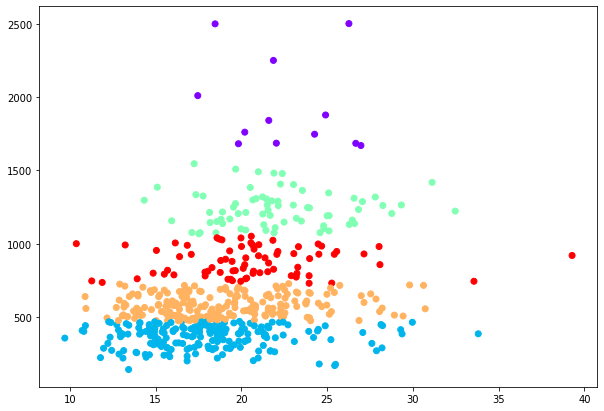

In [40]:
plt.figure(figsize=(10,7))
plt.scatter(MatrizVariables[:,0], MatrizVariables[:,1], c=MParticional.labels_, cmap='rainbow' )
plt.show()

In [42]:
CentroidesP = MParticional.cluster_centers_
pd.DataFrame(CentroidesP.round(4), columns=['Texture','Area','Smoothness','Compactness','Symmetry','FractalDimension'])

,Texture,Area,Smoothness,Compactness,Symmetry,FractalDimension
0,22.5467,1934.1667,0.1079,0.1907,0.1929,0.0604
1,18.0333,368.6868,0.0954,0.0809,0.1803,0.0655
2,22.0887,1237.9155,0.1005,0.1485,0.1918,0.0601
3,18.9190,582.7010,0.0938,0.0968,0.1749,0.0617
4,20.5707,878.8360,0.1003,0.1335,0.1887,0.0614


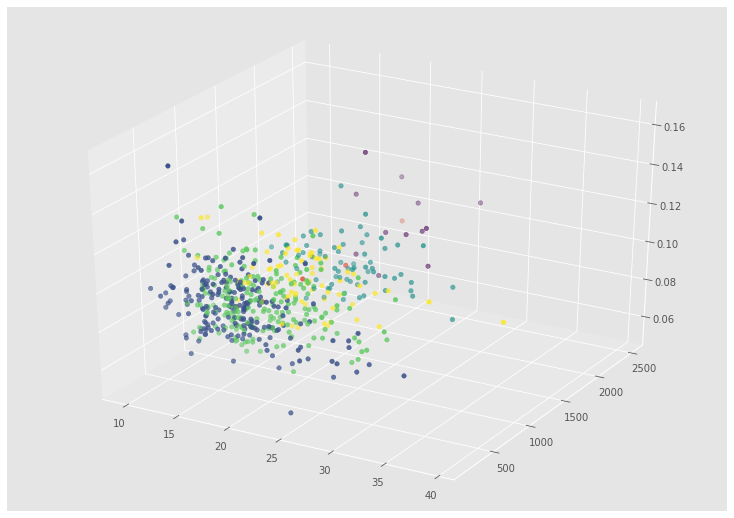

In [49]:
#Gráfica de los elementos y los centros de los clusters
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10,7)
plt.style.use('ggplot')
colores = ['red','blue','cyan','green','yellow']
asignar = []
for row in MParticional.labels_:
  asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(MatrizVariables[:,0], MatrizVariables[:,1],MatrizVariables[:,2], c=MParticional.labels_)
ax.scatter(CentroidesP[:,0], CentroidesP[:,1], CentroidesP[:,2])